

**Code Explanation:**

1. **Import Libraries:**
   - `keras`: For building and training the neural network.
   - `matplotlib.pyplot`: For plotting graphs.
   - `numpy`: For numerical operations.
   - `keras.datasets.boston_housing`: To load the Boston Housing dataset.
   - `sklearn.preprocessing.StandardScaler`: For scaling the data.

2. **Load and Preprocess Data:**
   - `(xtrain, ytrain), (xtest, ytest) = boston_housing.load_data()`: Loads the Boston Housing dataset, splitting it into training and testing sets.
   - `print(ytrain.shape), print(ytest.shape), print(xtrain.shape)`: Prints the shapes of the loaded data.
   - `sc = StandardScaler()`: Creates a StandardScaler object for data standardization.
   - `xtrain = sc.fit_transform(xtrain)`: Fits the scaler to the training data and transforms it to have zero mean and unit variance.
   - `xtest = sc.transform(xtest)`: Transforms the testing data using the same scaler fitted to the training data.

3. **Build the Neural Network:**
   - `model = keras.models.Sequential()`: Creates a sequential model, which is a linear stack of layers.
   - `model.add(keras.layers.Dense(32, input_dim=13))`: Adds the first dense layer with 32 neurons and 13 input dimensions (matching the number of features in the dataset).
   - `model.add(keras.layers.Activation('relu'))`: Adds a ReLU activation function to the first layer.
   - `model.add(keras.layers.Dense(16))`: Adds a second dense layer with 16 neurons.
   - `model.add(keras.layers.Activation('relu'))`: Adds a ReLU activation function to the second layer.
   - `model.add(keras.layers.Dense(1))`: Adds the final dense layer with 1 neuron for the output (predicting the house price).

4. **Model Summary:**
   - `model.summary()`: Prints a summary of the model's architecture, including the number of layers, neurons, and parameters.

5. **Compile the Model:**
   - `model.compile(loss='mse', optimizer='adam', metrics=['mae'])`: Compiles the model with:
     - `loss='mse'`: Mean squared error as the loss function.
     - `optimizer='adam'`: Adam optimizer for updating weights.
     - `metrics=['mae']`: Mean absolute error as a metric to evaluate performance.

6. **Train the Model:**
   - `history = model.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.2)`: Trains the model for 100 epochs with a batch size of 32, using 20% of the training data for validation.

7. **Evaluate the Model:**
   - `loss, mae = model.evaluate(xtest, ytest, verbose=0)`: Evaluates the model on the testing data and prints the mean absolute error.

8. **Plot Training and Validation Loss:**
   - `plt.plot(history.history['loss'])`: Plots the training loss over epochs.
   - `plt.plot(history.history['val_loss'])`: Plots the validation loss over epochs.
   - The plot helps visualize the model's training progress and identify potential overfitting.

9. **Make Predictions:**
   - `predictions = model.predict(xtest)`: Makes predictions on the testing data using the trained model.

10. **Plot Predictions vs Actual Values:**
   - `plt.scatter(ytest, predictions)`: Creates a scatter plot comparing the actual house prices (ytest) to the predicted prices.
   - This plot helps assess the model's accuracy visually.

This code provides a basic example of using a Multi-Layer Perceptron (MLP) for regression on the Boston Housing dataset. You can further experiment with different network architectures, hyperparameters, and data preprocessing techniques to improve the model's performance.

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

In [ ]:
(xtrain , ytrain , ), (xtest , ytest ) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(ytrain.shape)
print(ytest.shape)
print(xtrain.shape)

(404,)
(102,)
(404, 13)


In [ ]:
# Hint : for regression we dont need change data to categorical

In [ ]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
print(xtrain.std())
print(xtrain.mean())
xtest = sc.transform(xtest)
print(xtest.std())
print(xtest.mean())


0.9999999999999993
2.6016254395785847e-15
0.9836083446422431
0.020826991430640224


In [ ]:
# structure of network
model = keras.models.Sequential()
model.add(keras.layers.Dense(32 , input_dim=13))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(16))
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(keras.optimizers.Adadelta(learning_rate=0.4),
              loss='mse')

In [ ]:
output_fit = model.fit(xtrain , ytrain , batch_size=128 , epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 592.3195
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 582.8068  
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 594.7973  
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 585.1133  
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 596.1165  
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 584.1524  
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 544.6520  
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 563.0872  
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 557.7675 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 562.6957  
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 536.4077 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 519.7214 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 502.0865 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 484.7754 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [ ]:
print(output_fit.history.keys())

dict_keys(['loss'])


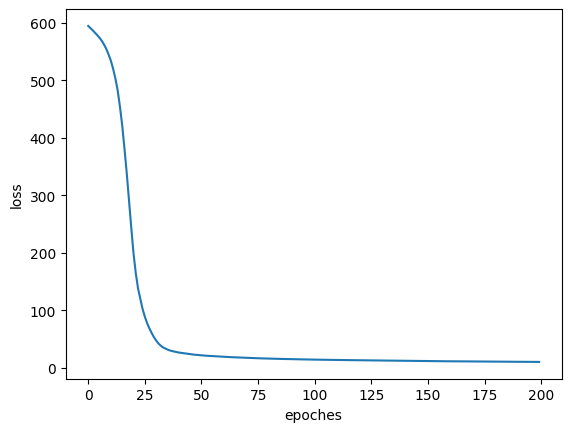

In [ ]:
plt.plot(output_fit.history['loss'])
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()

In [ ]:
output_prediction = model.predict(xtest , batch_size=64)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [ ]:
# print(ytrain[0:10])
# print(output_prediction)

In [ ]:
out_eval = model.evaluate(xtest , ytest , batch_size=64)
print(out_eval)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.3997  
17.52066993713379
